In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Drivers License Data.csv")
df.head()

,Applicant ID,Gender,Age Group,Race,Training,Signals,Yield,Speed Control,Night Drive,Road Signs,Steer Control,Mirror Usage,Confidence,Parking,Theory Test,Reactions,Qualified
0,AID0001,Male,Young Adult,Other,NaN,38.48,30.29,37.03,33.53,39.61,58.16,53.42,35.32,38.19,70.68,Average,No
1,AID0002,Female,Young Adult,Black,NaN,51.76,19.13,63.05,34.87,19.56,16.48,27.97,22.91,24.23,78.18,Average,No
2,AID0003,Male,Middle Age,Black,NaN,30.21,48.13,43.13,42.43,60.93,20.74,28.86,32.32,44.11,79.60,Fast,Yes
3,AID0004,Male,Young Adult,Other,NaN,34.75,47.28,50.49,42.10,22.52,33.87,48.52,24.90,37.56,57.34,Average,No
4,AID0005,Male,Teenager,Other,Advanced,78.52,83.93,59.79,52.68,67.47,89.24,30.31,43.85,55.91,78.44,Average,Yes


In [3]:
df.shape

(500, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Applicant ID   500 non-null    object 
 1   Gender         500 non-null    object 
 2   Age Group      500 non-null    object 
 3   Race           500 non-null    object 
 4   Training       350 non-null    object 
 5   Signals        500 non-null    float64
 6   Yield          500 non-null    float64
 7   Speed Control  500 non-null    float64
 8   Night Drive    500 non-null    float64
 9   Road Signs     500 non-null    float64
 10  Steer Control  500 non-null    float64
 11  Mirror Usage   500 non-null    float64
 12  Confidence     500 non-null    float64
 13  Parking        500 non-null    float64
 14  Theory Test    500 non-null    float64
 15  Reactions      500 non-null    object 
 16  Qualified      500 non-null    object 
dtypes: float64(10), object(7)
memory usage: 66.5+ KB


In [5]:
num_df = df.select_dtypes(include=[np.number])

central_tendency = {
    "Mean": num_df.mean(),
    "Median": num_df.median(),
    "Mode": num_df.mode().iloc[0]
}
central_tendency_df = pd.DataFrame(central_tendency)
print("\n--- Central Tendency ---")
print(central_tendency_df)


--- Central Tendency ---
                   Mean  Median   Mode
Signals        48.52546  48.415  33.22
Yield          47.78400  48.950   0.00
Speed Control  47.93174  49.405   0.00
Night Drive    47.87776  48.160  41.32
Road Signs     47.79344  49.310   0.00
Steer Control  47.42948  48.220  26.75
Mirror Usage   48.15758  48.360  39.94
Confidence     47.65444  48.255  65.84
Parking        48.45236  49.400  36.65
Theory Test    70.62338  69.855  42.41


In [6]:
dispersion = {
    "Variance": num_df.var(),
    "Std Dev": num_df.std(),
    "Range": num_df.max() - num_df.min(),
    "IQR": num_df.quantile(0.75) - num_df.quantile(0.25)
}
dispersion_df = pd.DataFrame(dispersion)
print("\n--- Dispersion ---")
print(dispersion_df)


--- Dispersion ---
                 Variance    Std Dev  Range      IQR
Signals        265.524643  16.294927  94.84  21.2600
Yield          257.993576  16.062178  94.41  22.0625
Speed Control  243.398743  15.601242  89.43  21.0950
Night Drive    234.172411  15.302693  88.19  21.4050
Road Signs     257.374172  16.042885  88.87  22.2250
Steer Control  242.736524  15.580004  89.24  20.1750
Mirror Usage   239.007454  15.459866  90.77  20.4400
Confidence     257.795821  16.056021  85.16  22.0075
Parking        246.669080  15.705702  88.36  21.8025
Theory Test    319.128834  17.864177  59.65  31.7650


In [17]:
def plot_pdf_cdf(data, col):
    plt.figure(figsize=(10,5))
    plt.subplot(2,2,1)
    sns.histplot(data[col], kde=True, stat="density", bins=20, color="skyblue")
    plt.title(f"PDF of {col}")
    plt.subplot(2,2,2)
    sorted_vals = np.sort(data[col])
    cdf = np.arange(1, len(sorted_vals)+1) / len(sorted_vals)
    plt.plot(sorted_vals, cdf, marker=".", linestyle="none")
    plt.title(f"CDF of {col}")
    plt.xlabel(col)
    plt.ylabel("CDF")
    plt.show()

C:\Users\Rithu Varshini V K\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


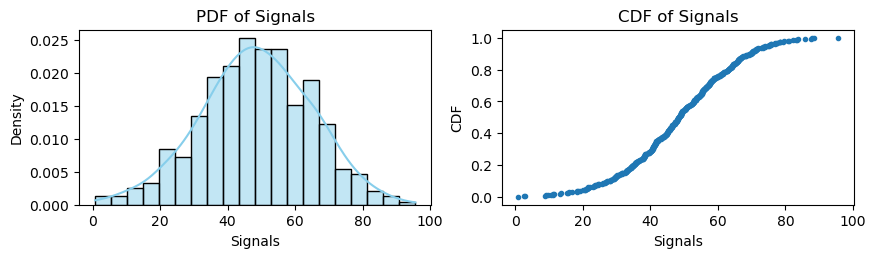

C:\Users\Rithu Varshini V K\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


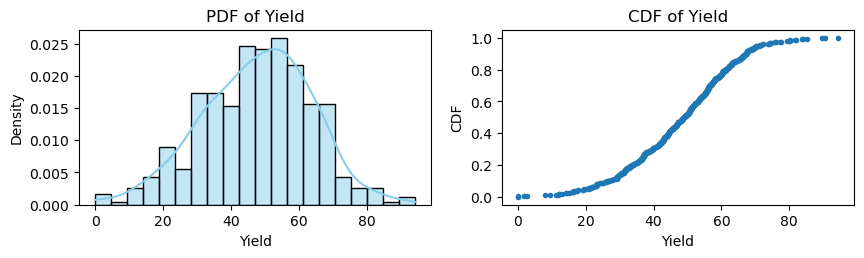

C:\Users\Rithu Varshini V K\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


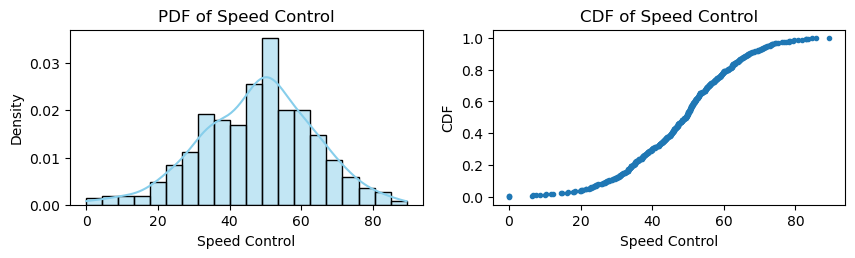

C:\Users\Rithu Varshini V K\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


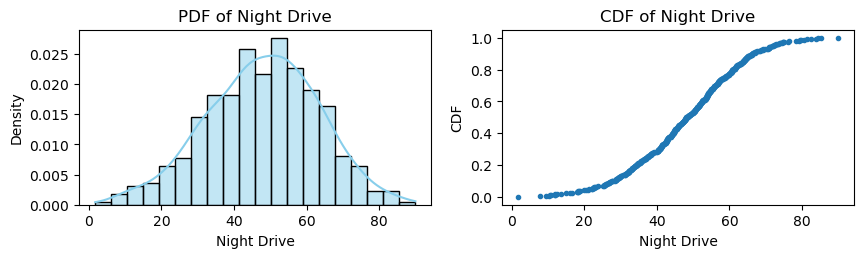

C:\Users\Rithu Varshini V K\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


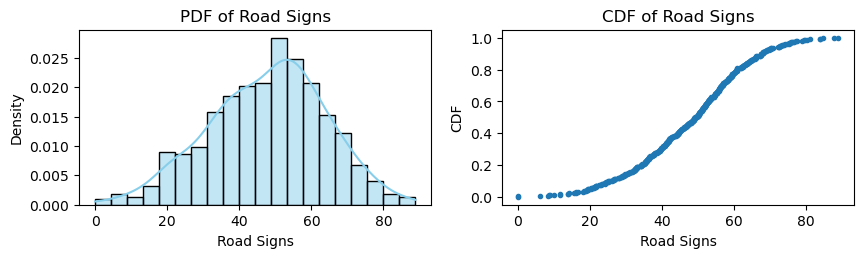

C:\Users\Rithu Varshini V K\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


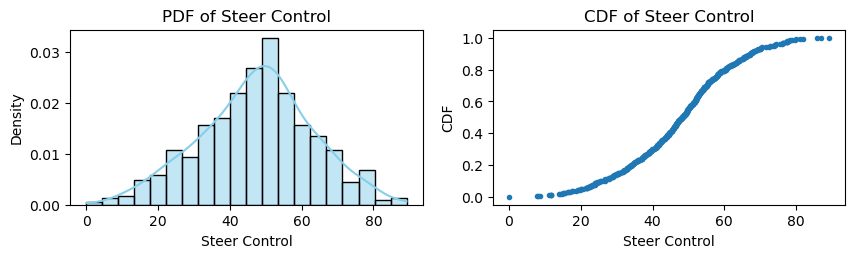

C:\Users\Rithu Varshini V K\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


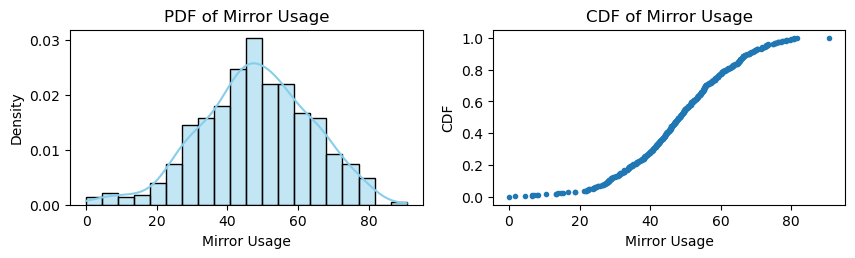

C:\Users\Rithu Varshini V K\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


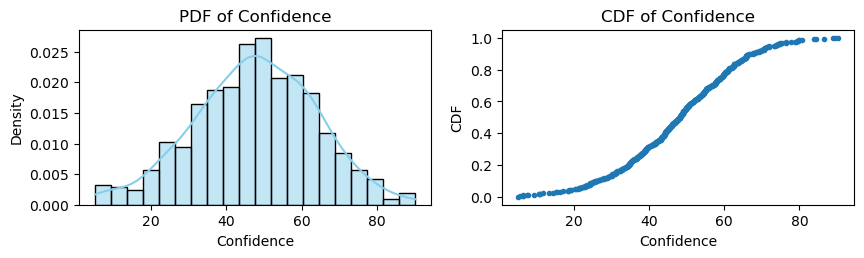

C:\Users\Rithu Varshini V K\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


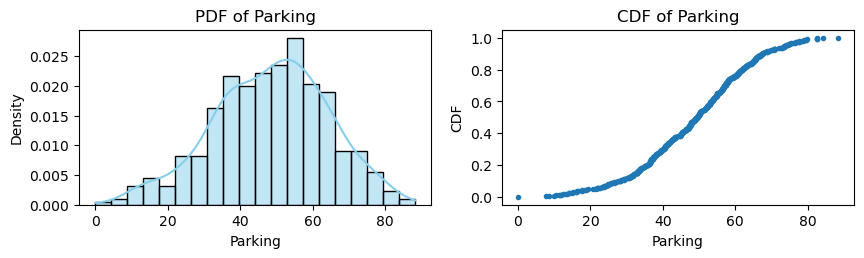

C:\Users\Rithu Varshini V K\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


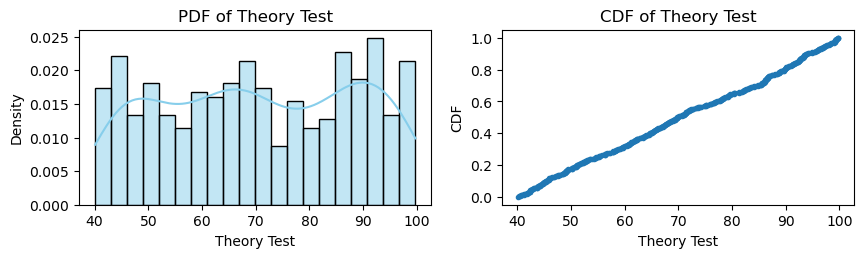

In [18]:
for col in num_df.columns:
    plot_pdf_cdf(num_df, col)

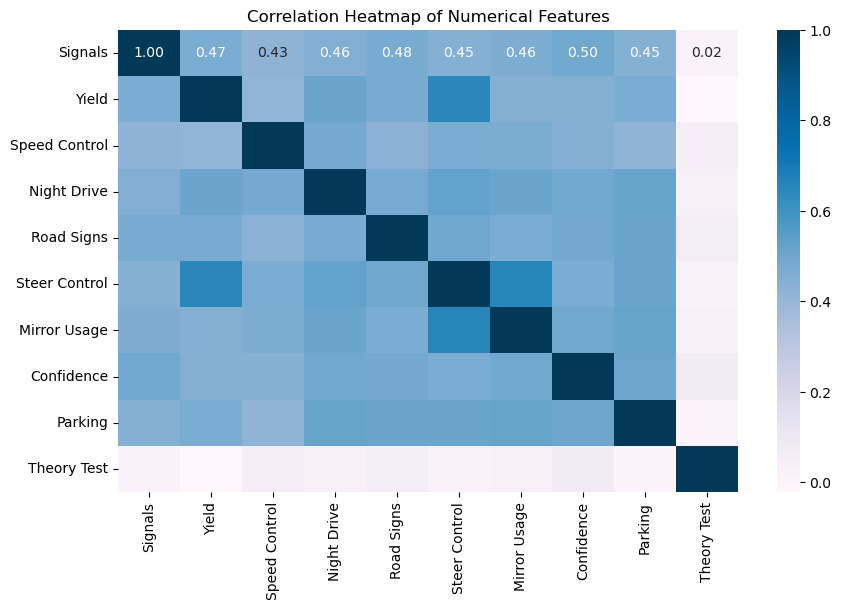

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(num_df.corr(), annot=True, cmap="PuBu", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [23]:
# Skewness & Kurtosis
skew_kurt = pd.DataFrame({
    "Skewness": num_df.skew(),
    "Kurtosis": num_df.kurt()
})
print("\n--- Skewness & Kurtosis ---")
print(skew_kurt)



--- Skewness & Kurtosis ---
               Skewness  Kurtosis
Signals       -0.113371 -0.076906
Yield         -0.220841 -0.000514
Speed Control -0.240397  0.112417
Night Drive   -0.167597 -0.152233
Road Signs    -0.227364 -0.191369
Steer Control -0.141525 -0.129933
Mirror Usage  -0.221527  0.010099
Confidence    -0.145087 -0.097284
Parking       -0.229114 -0.189619
Theory Test   -0.034659 -1.263861



--- Box-Cox Transformation for Night Drive ---
Lambda value: 1.1099268022898985


C:\Users\Rithu Varshini V K\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rithu Varshini V K\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


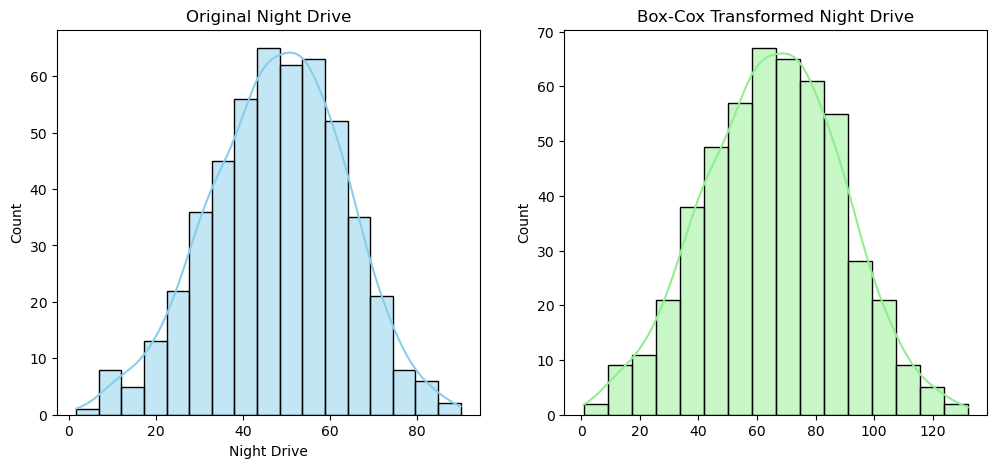

In [25]:
from scipy.stats import boxcox

# Apply Box-Cox transformation on a numeric column (example: 'Sleep_Duration')
col = "Night Drive"

# Ensure strictly positive (shift if needed)
data = num_df[col]
if (data <= 0).any():
    data = data - data.min() + 1

transformed, lambda_val = boxcox(data)

print(f"\n--- Box-Cox Transformation for {col} ---")
print(f"Lambda value: {lambda_val}")

# Compare original vs transformed distribution
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(data, kde=True, color="skyblue")
plt.title(f"Original {col}")

plt.subplot(1,2,2)
sns.histplot(transformed, kde=True, color="lightgreen")
plt.title(f"Box-Cox Transformed {col}")

plt.show()
